## Lib

In [1]:
import tensorflow as tf
import keras
import pickle
import numpy as np

import visualkeras
import json

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix

from keras.preprocessing import image
from keras.applications.efficientnet_v2 import preprocess_input
import requests
import cv2

2024-04-24 13:11:59.012456: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-24 13:11:59.051403: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 13:11:59.606927: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Vars

In [2]:
model_path = "../../storage/models/trained/generated_model_efficientnetv2_21k_finetuned_1k_v1_trained.keras"
history_path = "../../storage/models/histories/generated_model_efficientnetv2_21k_finetuned_1k_v1_trained_history.pickle" 
test_dataset_path = "../../storage/datas/tf_datasets/test_dataset"

encoded_labels_json_path = "../../storage/datas/json/encoded_labels.json"

## Load Model & test Dataset

In [3]:
# Load model
model = keras.saving.load_model(model_path)

with open(history_path, 'rb') as file:
    history = pickle.load(file)

print(history.keys())


# Load datasets
test_datas = tf.data.experimental.load(test_dataset_path)

2024-04-24 13:12:01.104971: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-24 13:12:01.131249: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


dict_keys(['accuracy', 'loss', 'top_k_categorical_accuracy', 'val_accuracy', 'val_loss', 'val_top_k_categorical_accuracy', 'learning_rate'])
Instructions for updating:
Use `tf.data.Dataset.load(...)` instead.


/home/guillaume/OneDrive/Developpement/repo/mushroom_datascience/.venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 496 variables whereas the saved optimizer has 2 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [4]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,006,803 (76.32 MB)

 Trainable params: 6,648,731 (25.36 MB)

 Non-trainable params: 60,608 (236.75 KB)

 Optimizer params: 13,297,464 (50.73 MB)

In [5]:
visualkeras.layered_view(model,
                         legend=True,
                         draw_volume=True,
                         spacing = 30)

AttributeError: 'InputLayer' object has no attribute 'output_shape'

## Evaluate

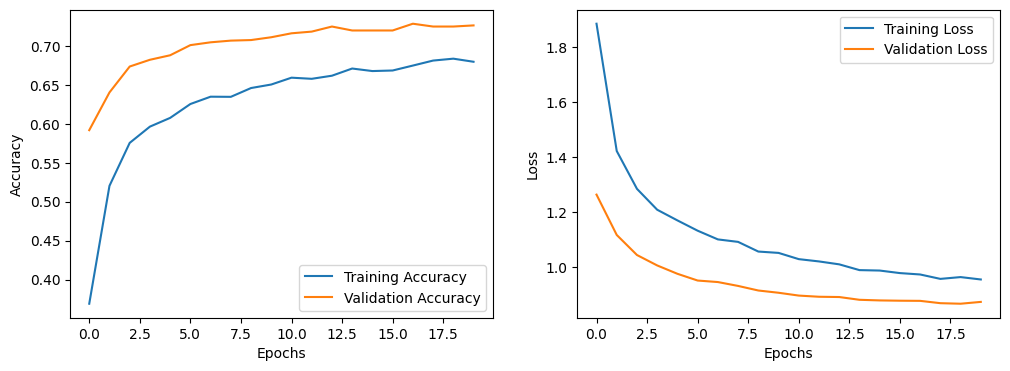

In [ ]:
# Accuracy & Val_accuracy plot (training model)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training loss & Val loss plot (training model)
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

In [ ]:
test_results = model.evaluate(test_datas)
print("Test evaluation:", test_results)
y_pred = model.predict(test_datas)

22/22 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.7474 - loss: 0.8173 - top_k_categorical_accuracy: 0.9172
Test evaluation: [0.87030029296875, 0.7185238599777222, 0.9088277816772461]
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step


In [ ]:
# Classification report
y_test = []
for _, label in test_datas:
    y_test.extend(np.argmax(label.numpy(), axis=-1)) 
y_test = np.array(y_test)

y_pred_classes = np.argmax(y_pred, axis=1)

report = classification_report(y_test, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       119
           1       0.68      0.88      0.77       102
           2       0.77      0.80      0.79       117
           3       0.73      0.64      0.68       130
           4       0.70      0.73      0.71       142
           5       0.79      0.79      0.79       151
           6       0.66      0.62      0.64       125
           7       0.74      0.80      0.77       117
           8       0.70      0.70      0.70       105
           9       0.81      0.88      0.85       152
          10       0.45      0.25      0.32       122

    accuracy                           0.72      1382
   macro avg       0.70      0.72      0.71      1382
weighted avg       0.71      0.72      0.71      1382



2024-04-24 12:21:44.224190: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


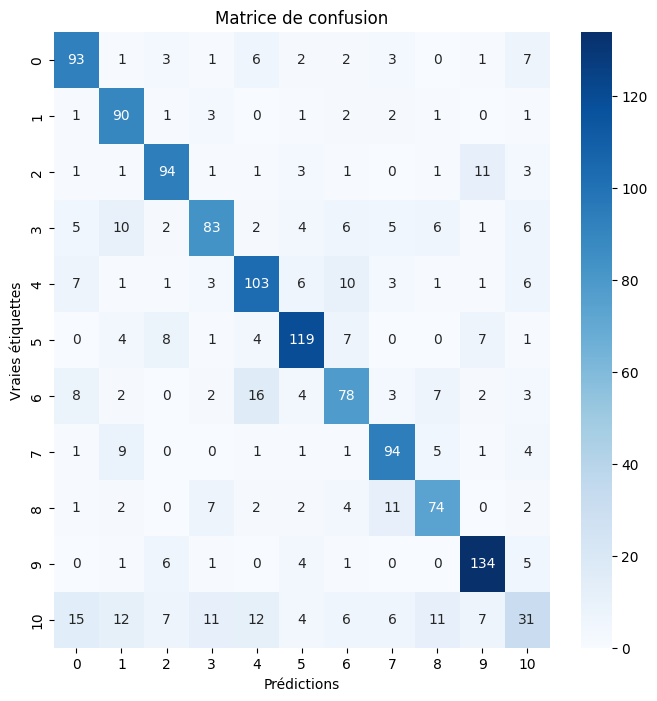

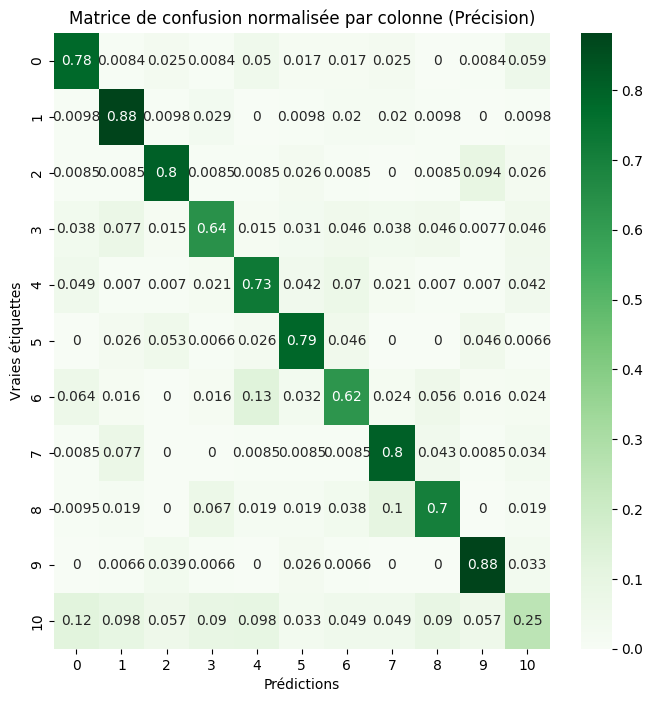

In [ ]:
# Confusion Matrix

confusion_mtx = confusion_matrix(y_test, y_pred_classes)
confusion_mtx_normalized = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]

# Matrice de confusion
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()

# Matrice de confusion normalisée
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_mtx_normalized, annot=True, cmap='Greens')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion normalisée par colonne (Précision)')
plt.show()

In [ ]:
# Create dictionary of encoded labels from json file
with open(encoded_labels_json_path, 'r') as file:
    encoded_labels = json.load(file)

# Reverse dictionary
encoded_labels = {v: k for k, v in encoded_labels.items()}

# Display dictionary
encoded_labels

{0: 'Boletus edulis',
 1: 'Galerina marginata',
 2: 'Ganoderma applanatum',
 3: 'Hypholoma fasciculare',
 4: 'Lepista nuda',
 5: 'Pleurotus ostreatus',
 6: 'Pluteus cervinus',
 7: 'Psilocybe cyanescens',
 8: 'Psilocybe zapotecorum',
 9: 'Trametes versicolor',
 10: 'other'}

2024-04-24 12:43:51.867456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


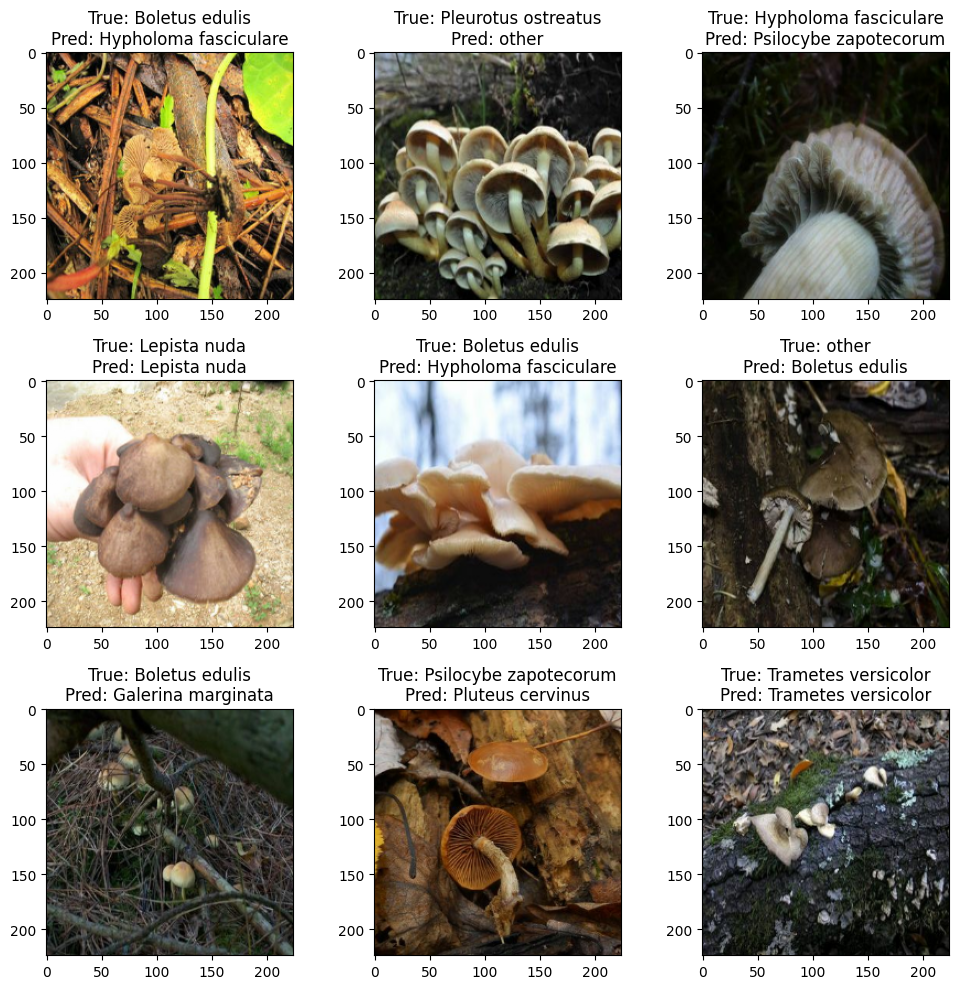

In [ ]:
import matplotlib.pyplot as plt
import random
import tensorflow as tf

# Convert dataset to list
test_data_list = list(test_datas)

# Choose 9 randoms indexes
random_indices = random.sample(range(len(test_data_list)), 9)

# Display images & labels
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    img, label = test_data_list[random_indices[i]]
    img = img.numpy()

    random_index = random.randint(0, len(img) - 1)
    img = img[random_index]

    true_label = encoded_labels[np.argmax(label)]
    predicted_label = encoded_labels[y_pred_classes[random_indices[i]]]

    ax.imshow(img)
    ax.set_title(f"True: {true_label}\nPred: {predicted_label}")

plt.tight_layout()
plt.show()

### Predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


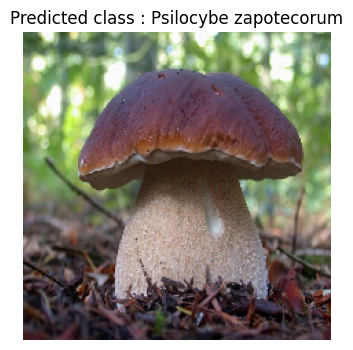

In [ ]:
# IMG URL
url = 'https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.cestaysetas.com%2Fwp-content%2Fuploads%2F2012%2F04%2F74134_160039200702311_100000886951071_284104_687032_n.jpg&f=1&nofb=1&ipt=8d65de19db5d94f6e3b4757f812aecdced3aecca20c01dc0cdb9080939a3c57f&ipo=images'


# load img, pre-process
response = requests.get(url)
if response.status_code == 200:
    image_data = response.content
    img_web = cv2.imdecode(np.frombuffer(image_data, np.uint8), cv2.IMREAD_COLOR)
    img_web = cv2.cvtColor(img_web, cv2.COLOR_BGR2RGB)
    img_web = cv2.resize(img_web, (224, 224))


    w = image.img_to_array(img_web)
    w = np.expand_dims(w, axis=0)
    w = preprocess_input(w)
    
# Predict
web_prediction = model.predict(w)
index_classe_web = np.argmax(web_prediction)
nom_classe_predite = encoded_labels[index_classe_web]

# Show img with predicted class

# Obtenir la classe réelle par rapport au chemin de l'image
plt.figure(figsize=(4, 4))
plt.imshow(img_web)
plt.title(f'Predicted class : {nom_classe_predite}')
plt.axis('off')
plt.show()